# Lecture 26: Sample Means

In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Central Limit Theorem ##

In [2]:
united = Table.read_table('united_summer2015.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


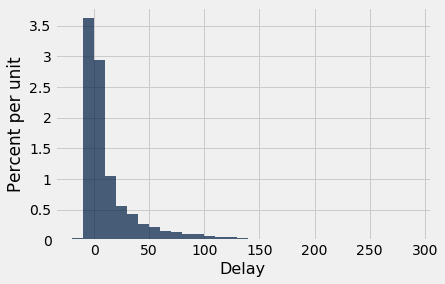

In [3]:
united.hist('Delay', bins = np.arange(-20, 300, 10))

In [4]:
delays = united.column('Delay')
mean_delay = np.mean(delays)
sd_delay = np.std(delays)

mean_delay, sd_delay

(16.658155515370705, 39.480199851609314)

In [5]:
percentile(50, delays)

2

In [6]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x))/np.std(x)

In [7]:
united = united.with_columns(
    'Delay in Standard Units', standard_units(delays)
)
united.sort('Delay', descending=True)

Date,Flight Number,Destination,Delay,Delay in Standard Units
6/21/15,1964,SEA,580,14.269
6/22/15,300,HNL,537,13.1798
6/21/15,1149,IAD,508,12.4453
6/20/15,353,ORD,505,12.3693
8/23/15,1589,ORD,458,11.1788
7/23/15,1960,LAX,438,10.6722
6/23/15,1606,ORD,430,10.4696
6/4/15,1743,LAX,408,9.91236
6/17/15,1122,HNL,405,9.83637
7/27/15,572,ORD,385,9.32979


In [8]:
chosen = united.where('Delay in Standard Units', are.between(-3, 3))
chosen.num_rows/united.num_rows

0.9790235081374322

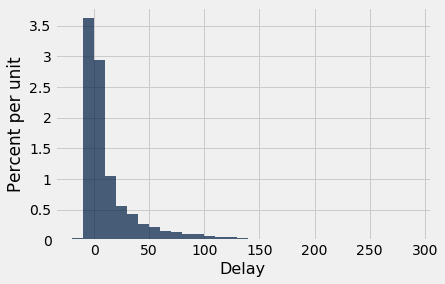

In [9]:
united.hist('Delay', bins = np.arange(-20, 300, 10))

## Shape of Distribution of Sample Average ##

**Goal:**
- Fix a sample size, say 10.
- **Sample** 10 times randomly with replacement from all the flights; **find the average** dealy of the sampled flights.
- **Repeat** this "sample and find the sample mean" process numerous times.
- **Draw a histogram** of the numerous sample means.

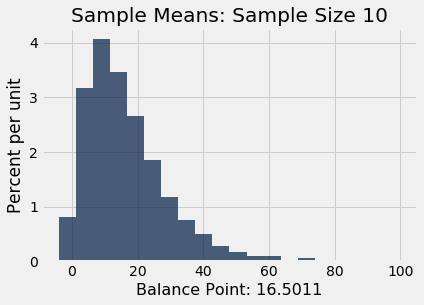

In [10]:
sample_size = 10
repetitions = 10000

means = make_array()

for i in np.arange(repetitions):
    sampled_flights = united.sample(sample_size)
    sample_mean = np.mean(sampled_flights.column('Delay'))
    means = np.append(means, sample_mean)
    
Table().with_columns('Sample Mean', means).hist(bins = 20)

plots.title('Sample Means: Sample Size ' + str(sample_size));

plots.xlabel('Balance Point: ' + str(np.mean(means)));

**Back to slides.**

## Variability of the Sample Average ##

In [11]:
repetitions = 10000
means_tbl = Table()

for sample_size in [400, 900]:

    means = make_array()

    for i in np.arange(repetitions):
        sampled_flights = united.sample(sample_size)
        sample_mean = np.mean(sampled_flights.column('Delay'))
        means = np.append(means, sample_mean)
        
    means_tbl = means_tbl.with_columns(str(sample_size), means)

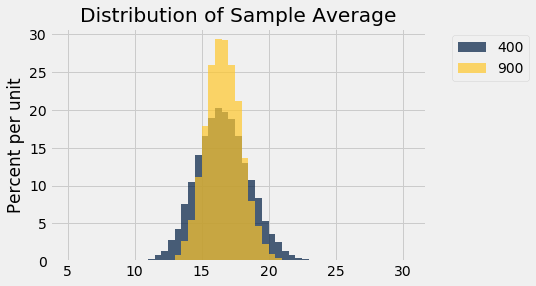

In [12]:
means_tbl.hist(bins = np.arange(5, 31, 0.5))
plots.title('Distribution of Sample Average');

**Back to slides.**

In [13]:
united.num_rows ** 400

1845253300060122534684058597421182951017338738756884128476156537109395559702295050837795610986469015706417701209704203890696502616877632733167737247128710898267622177602279004150237321497531712957437744194467949953310673085563343687922543234838511385550568262088418334016217887061735745358842456577208939555740404373614633941136938352510678553686140728842897559436843191863609514780562396147921834537075860636817493656816017587537752125750151805566479543166742758254440594398100342650860455445795087942680221047750947255562969782801791748639952850756659518870235020316513575934561122027710440608023538776721761349403194150575014182981349346980577699633375066811153948871815566280319121565243984196831524157664160526536071758298269096548661601001356951548310460921171197940711389849058290284443729287317331793254191518876765178731748453564076631795997590039640387156475975294002056115371653663653810384491550154761367793765502453546587829476276348569091617961438914859251316410793595152416543512156519

In [14]:
"""Empirical distribution of random sample means"""

def sample_means(sample_size):
    
    repetitions = 10000
    means = make_array()

    for i in range(repetitions):
        sampled_flights = united.sample(sample_size)
        sample_mean = np.mean(sampled_flights.column('Delay'))
        means = np.append(means, sample_mean)

    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities
    sample_means.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    print('Repetitions :', repetitions)
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(united.column('Delay')))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(united.column('Delay')))
    print("SD of sample means:", np.std(means))

Repetitions : 10000
Sample size:  100
Population mean: 16.658155515370705
Average of sample means:  16.637418999999998
Population SD: 39.480199851609314
SD of sample means: 3.930759085525212


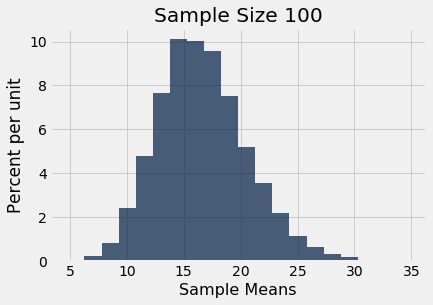

In [15]:
sample_means(100)

Repetitions : 10000
Sample size:  400
Population mean: 16.658155515370705
Average of sample means:  16.650032999999997
Population SD: 39.480199851609314
SD of sample means: 1.9712816120257906


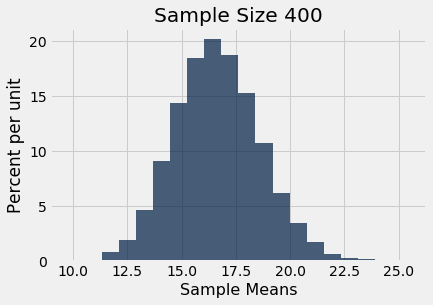

In [16]:
sample_means(400)

Repetitions : 10000
Sample size:  625
Population mean: 16.658155515370705
Average of sample means:  16.65417888
Population SD: 39.480199851609314
SD of sample means: 1.5683792205107618


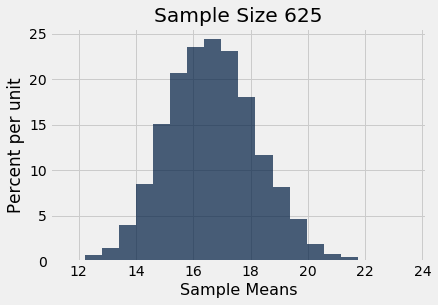

In [17]:
sample_means(625)

In [18]:
sd_delay

39.480199851609314

In [19]:
repetitions = 10000
sample_sizes = np.arange(50, 401, 50)

sd_of_means = make_array()

for n in sample_sizes:
    means = make_array()
    for i in np.arange(repetitions):
        means = np.append(means, np.mean(united.sample(n).column('Delay')))
    sd_of_means = np.append(sd_of_means, np.std(means))

sd_comparison = Table().with_columns(
    'Sample Size n', sample_sizes,
    'SD of 10,000 Sample Means', sd_of_means,
    'Population_SD/sqrt(n)', sd_delay/np.sqrt(sample_sizes)
)

In [20]:
sd_comparison

Sample Size n,"SD of 10,000 Sample Means",Population_SD/sqrt(n)
50,5.64424,5.58334
100,3.93434,3.94802
150,3.21566,3.22354
200,2.7993,2.79167
250,2.51002,2.49695
300,2.29318,2.27939
350,2.09996,2.11031
400,1.98393,1.97401


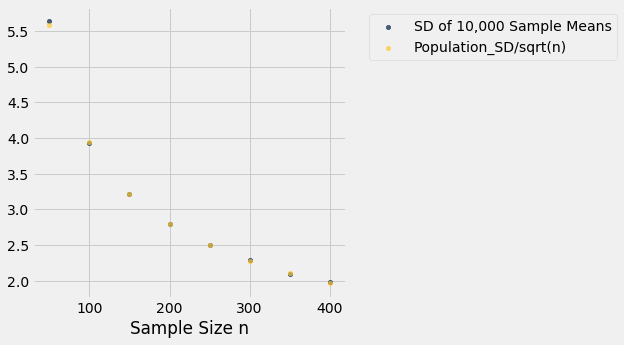

In [21]:
sd_comparison.scatter('Sample Size n')